# Exploratory Data Analysis (King County Housing)

## 1. Loading the libraries

In [596]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Reading in the data

In [597]:
housing = pd.read_csv('data/King_County_House_prices_dataset.csv')

## 3. Exploring the variables and values

In [598]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [599]:
# What datatypes are there?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [600]:
# What variables are non continuous?
housing.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Low-count variables: bedrooms, bathrooms, floors, view
Binary: waterfront
Categorical (ordinal): condition, grade 
Categorical (unordered/not linearly ordered):  

## 5. Data Cleaning

In [601]:
# one house apperently had 33 bedrooms but only 1.75 bathrooms
housing.bedrooms.replace(33, np.nan, inplace=True)
# one house apperently was build in the birth year of Christ
housing.yr_renovated.replace(np.NaN, 0, inplace=True)

In [602]:
housing.sqft_basement.replace('?', 0, inplace=True)
housing.sqft_basement = pd.Series(housing.sqft_basement, dtype='float64')

## 5. Formatting the variables

Setting the date in the correct format

In [603]:
housing.date = pd.to_datetime(housing.date)
# checking for irregularities
print(housing.date.min() , ' to ' , housing.date.max())

2014-05-02 00:00:00  to  2015-05-27 00:00:00


Declaring the zipcode as a categorical variable

In [604]:
housing.zipcode = pd.Series(housing.zipcode, dtype='category')

Setting the minimum of the data in years to zero

In [605]:
# housing.yr_built = housing.yr_built - min(housing.yr_built)
# housing.yr_renovated = housing.yr_renovated - min(housing.yr_renovated[housing.yr_renovated > 1600])
# housing.yr_renovated.replace(min(housing.yr_renovated), 0, inplace=True)

Creating a helper variable

In [606]:
housing['price_sqft'] = housing.price / housing.sqft_lot

Creating another meaningful variable

In [607]:
avg_price_sqft_zipcode_dict = housing.groupby('zipcode').mean().price_sqft.reindex().to_dict()
housing['avg_price_sqft_zipcode'] = housing.zipcode.map(avg_price_sqft_zipcode_dict)
housing.avg_price_sqft_zipcode = pd.Series(housing.avg_price_sqft_zipcode, dtype='float64')

The date of a renovation only matters when the building is old. And it probably matters more regarding the price than the original construction date. A lot of new buildiungs also are not renovated yet. Therefore a new variable is created.

In [615]:
#Make this nicer!

yr_built_or_renovated = []
for row in range(housing.shape[0]):
    if housing.yr_renovated[row] > housing.yr_built[row]:
        yr_built_or_renovated.append(housing.yr_renovated[row])
    else:
        yr_built_or_renovated.append(housing.yr_built[row])
housing['yr_built_or_renovated'] = pd.Series(yr_built_or_renovated, dtype='float64')

## 6. Inspecting the distributions of the variables

In [609]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_sqft,avg_price_sqft_zipcode,yr_built_or_renovated
count,2.159700e+04,2.159700e+04,21596.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21596.000000
mean,4.580474e+09,5.402966e+05,3.371828,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,...,285.716581,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512,88.988978,88.988978,1972.943508
std,2.876736e+09,3.673681e+05,0.904114,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,...,439.819830,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950,94.059663,63.725055,28.945081
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,0.163119,15.196643,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,33.333333,39.998968,1954.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,59.262128,71.443966,1977.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,107.609531,104.773639,1999.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2019.704433,322.561090,2015.000000


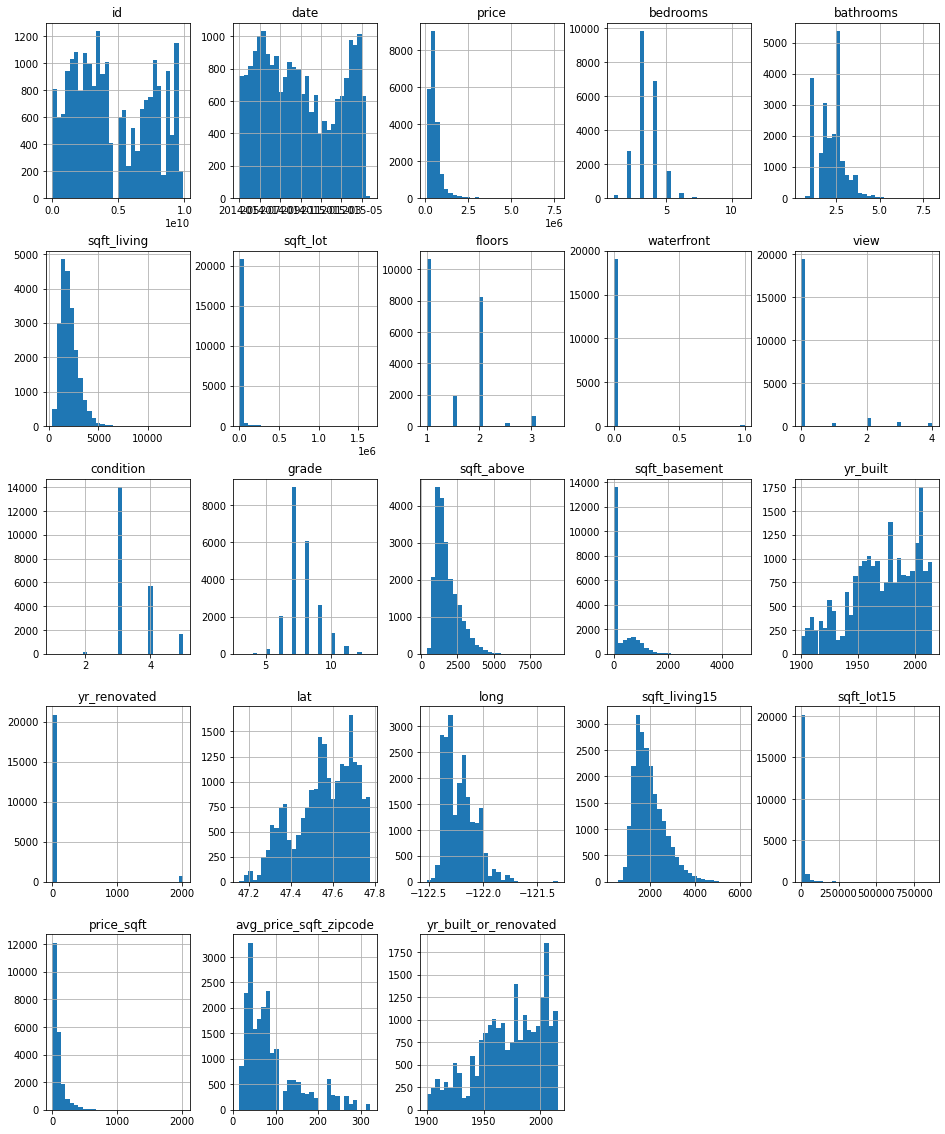

In [618]:
housing.hist(figsize=(16, 20), bins=30);